In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randn

%matplotlib inline

# Grayscale Invars


In [57]:
def GSinvars(F,h=1):
    Fx, Fy = np.gradient(F, h)
    Fxx, Fxy = np.gradient(Fx, h)
    Fyx, Fyy = np.gradient(Fy, h)
  
    I1 = Fx*Fx + Fy*Fy
    I2 = Fxx + Fyy
    I3 = Fxx*Fxx + 2*Fxy*Fxy + Fyy*Fyy
    I4 = Fxx*Fx*Fx + 2*Fxy*Fx*Fy + Fyy*Fy*Fy
    
    I3t = I3/I1 - 2*I2*I4/(I1*I1) + I2*I2/I1
    I4t = I4/(I1*np.sqrt(I1)) - I2/np.sqrt(I1)
    
    #I3t = I3/I1 - 2*I2*I4/(I1*I1) + I2*I2/(I1*I1)
    #I4t = I4/I1 - I2/np.sqrt(I1)
    
    return I1, I2, I3t, I4t
    
def SA2signature(F, h=1):
    """ Compute equiaffine-invariant image signature using finite differences"""
    Fx, Fy = np.gradient(F, h)
    Fxx, Fxy = np.gradient(Fx, h)
    Fyx, Fyy = np.gradient(Fy, h)
    
    I0 = F # function value
    I1 = Fxx*Fyy - Fxy*Fyx # determinant
    I2 = Fyy*Fx*Fx - 2*Fxy*Fx*Fy + Fxx*Fy*Fy 

    return (I0, I1, I2)

def SA2transvectants(F, h=1):
    """ All the degree three and lower transvectants"""
    Fx, Fy = np.gradient(F, h)
    Fxx, Fxy = np.gradient(Fx, h)
    Fyx, Fyy = np.gradient(Fy, h)
    Fxxx, Fxxy = np.gradient(Fxx, h)
    Fxyx, Fxyy = np.gradient(Fxy, h)
    Fyyx, Fyyy = np.gradient(Fyy, h)
    
    I0 = F
    I1 = Fxx*Fyy - Fxy**2
    I2 = Fy**2*Fxx - 2*Fx*Fy*Fxy + Fx**2*Fyy
    I3 = Fyy*Fxxy**2 - Fyy*Fxxx*Fxyy - Fxy*Fxxy*Fxyy + Fxx*Fxyy**2 + Fxy*Fxxx*Fyyy - Fxx*Fxxy*Fyyy
    I4 = Fy*Fyy*Fxxx - 2*Fy*Fxy*Fxxy - Fx*Fyy*Fxxy + Fy*Fxx*Fxyy + 2*Fx*Fxy*Fxyy - Fx*Fxx*Fyyy
    
    return (I0, I1, I2, I3, I4)

## Test image
We use as our test function the function `f(x, y)` defined below

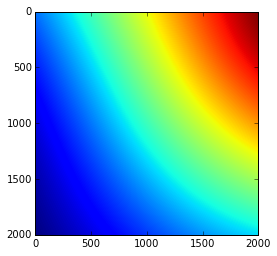

In [109]:
def f(x, y):
    return 0.5*(1 + np.sin(4*x) * np.cos(7*y)) * 2*np.exp(-10*((x - 0.1)**2 + (y+0.2)**2))

h = 0.0001
X, Y = np.meshgrid(np.arange(-.1, .1, h), np.arange(-0.1, 0.1, h))
F0 = f(X, Y)
plt.imshow(F0)

## Transformation
We generate a random equiaffine transformation $x \mapsto Ax + b$, $\det A = 1$ as follows:


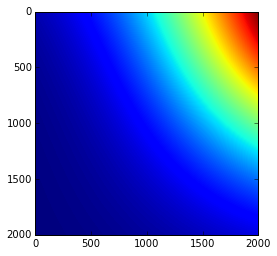

In [120]:
from numpy.random import rand, randn

A = np.random.randn(2,2)
if np.linalg.det(A) < 0:
    A[:, 1] = -A[:, 1]
A = A / np.sqrt(np.linalg.det(A))
b = 0.2 * randn(2)
Ainv = np.linalg.inv(A)
binv = -np.linalg.solve(A, b)

def g(F0):
    F2 = F0*F0*F0 #np.tanh(F0)
    return F2

plt.imshow(g(F0))

The image and its transformation are plotted below


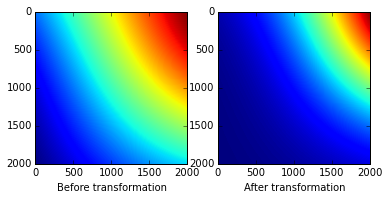

In [121]:
F1 = f(Ainv[0,0]*X + Ainv[0,1]*Y + binv[0], Ainv[1,0]*X + Ainv[1,1]*Y + binv[1])
F2 = g(F0)
fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(F0)
axarr[0].set_xlabel('Before transformation')
axarr[1].imshow(F2)
axarr[1].set_xlabel('After transformation')

## Compare signatures of the two images
We compare the signatures for a few contours (with respect to the function value)


[[ -1.04774763e-05  -1.04368810e-05  -1.03912722e-05  -1.03476284e-05
   -1.03042157e-05  -1.02625141e-05  -1.02189909e-05  -1.01749617e-05
   -1.01361665e-05  -1.00897072e-05]
 [ -1.04620208e-05  -1.04166269e-05  -1.03734389e-05  -1.03309267e-05
   -1.02859639e-05  -1.02442160e-05  -1.02014293e-05  -1.01614104e-05
   -1.01155651e-05  -1.00712820e-05]
 [ -1.04413109e-05  -1.03977761e-05  -1.03556738e-05  -1.03109589e-05
   -1.02679201e-05  -1.02276852e-05  -1.01864018e-05  -1.01404918e-05
   -1.00956640e-05  -1.00572654e-05]
 [ -1.04226518e-05  -1.03809625e-05  -1.03368085e-05  -1.02928031e-05
   -1.02528400e-05  -1.02110519e-05  -1.01644694e-05  -1.01193479e-05
   -1.00801541e-05  -1.00364479e-05]
 [ -1.04076637e-05  -1.03624539e-05  -1.03182347e-05  -1.02766266e-05
   -1.02350048e-05  -1.01884000e-05  -1.01442055e-05  -1.01026635e-05
   -1.00605293e-05  -1.00174797e-05]
 [ -1.03865973e-05  -1.03434133e-05  -1.03005959e-05  -1.02596792e-05
   -1.02139234e-05  -1.01698286e-05  -1.01275

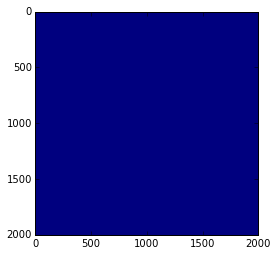

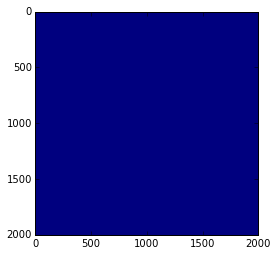

In [122]:
dum0,dum1,I3t,I4t = GSinvars(F0, h)
dum0,dum1,I3ta,I4ta = GSinvars(F2, h)
#contour_levels = [0.25, 0.5, 0.75, 1]

#print np.where(np.abs(I3t-I3ta)>0.01)
print I3t[20:30,20:30] - I3ta[20:30,20:30]
print I4t[:10,:10] - I4ta[:10,:10]

#I3t = np.where(I3t==np.inf,0,I3t)
#I3ta = np.where(I3ta==np.inf,0,I3ta)
#I4t = np.where(I4t==np.inf,0,I4t)
#I4ta = np.where(I4ta==np.inf,0,I4ta)

print np.mean(np.abs(I3t-I3ta))
print np.mean(np.abs(I4t-I4ta))

plt.figure()
plt.imshow(np.abs(I3t-I3ta))

plt.figure()
plt.imshow(np.abs(I4t-I4ta))


def normalise(I):
    I = I - np.min(I)
    I = I/np.max(I)
    return I

#print normalise(I4t)
#plt.figure()
#plt.imshow(normalise(I3t))
#plt.contour(I3ta, I4ta,color='red')


2.67963454002e-08


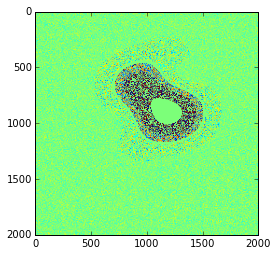

In [90]:
F2 = F0+0.2
Fx, Fy = np.gradient(F0, h)
Fx2, Fy2 = np.gradient(F2, h)
plt.figure()
plt.imshow(Fx-Fx2)
print np.sum(np.abs(Fx-Fx2))